# Proejct Preliminary Work - week 7

In [1]:
import numpy as np
import os
import struct
import requests

In [2]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("./Data/mnist/train-images-idx3-ubyte")
    test_images_path = os.path.abspath("./Data/mnist/t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("./Data/mnist/train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("./Data/mnist/t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [4]:
def printIMG(index):
    for a in range(28):
        for b in range(28):
            print(1 if x_train[index][a][b] > 50 else 0, end=" ")
        print(" ")


In [5]:
for i in range(5):
    printIMG(1)
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 1 

In [6]:
import pandas as pd
x = y_train.reshape(-1,1)
dataframe = pd.DataFrame.from_records(x)
dataframe = dataframe.rename(columns={0:'digit'})
dataframe

,digit
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


In [7]:
import seaborn as sns
ax = sns.countplot(x=dataframe.iloc[:,0], data=dataframe, palette='Blues_d')
fig = ax.get_figure()
fig.savefig("./Data/train_digit.png")
ax

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 5923,
 1.0: 6742,
 2.0: 5958,
 3.0: 6131,
 4.0: 5842,
 5.0: 5421,
 6.0: 5918,
 7.0: 6265,
 8.0: 5851,
 9.0: 5949}

In [9]:
x_train.flatten().reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_train.reshape(60000,1)

array([[5.],
       [0.],
       [4.],
       ...,
       [5.],
       [6.],
       [8.]])

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [12]:
knn = KNeighborsClassifier()

In [13]:
# create hyper-parameter grid
K = np.arange(10)+1
grid = {'n_neighbors':K}

In [14]:
# perform grid-search cross-validation
knnCV = GridSearchCV(knn,
                    param_grid=grid,
                    return_train_score=True,
                    n_jobs=-1)

In [15]:
train_dataset = np.concatenate((x_train.flatten().reshape(60000,784), y_train.reshape(60000,1)),axis=1)
train_set = pd.DataFrame.from_records(train_dataset)
train_set.head(3)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


4.0    528
7.0    527
6.0    527
1.0    511
2.0    499
9.0    498
0.0    495
3.0    483
8.0    481
5.0    451
Name: 784, dtype: int64


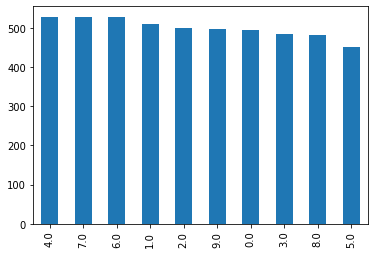

In [45]:
train_sample = train_set.sample(n=5000,random_state=3,replace=True)
train_sample[784].value_counts().plot.bar()
print(train_sample[784].value_counts())

In [46]:
feature_train = train_sample.drop(784,axis=1)
target_train = train_sample[784]

In [47]:
knnCV.fit(feature_train,target_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [48]:
knnCV.best_params_

{'n_neighbors': 1}

In [49]:
error_valid = 1 - knnCV.best_score_
print('lowest validaton error rate',error_valid.round(3))

lowest validaton error rate 0.068


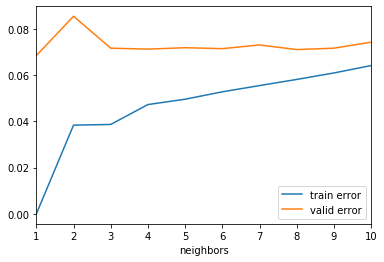

In [50]:
results = pd.DataFrame()
results['neighbors'] = K
results['train error'] = 1 - knnCV.cv_results_['mean_train_score']
results['valid error'] = 1 - knnCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='neighbors',y='train error')
results.plot.line(x='neighbors',y='valid error',ax=ax1)

In [51]:
# compute test results
error_test = 1- knnCV.score(x_test.flatten().reshape(10000,784),y_test.reshape(10000,1))
print('test error rate',error_test.round(3))

test error rate 0.062


In [52]:
prediction = knnCV.predict(x_test.flatten().reshape(10000,784))

1.0    1206
9.0    1057
7.0    1051
0.0    1013
3.0     994
6.0     975
2.0     975
4.0     934
5.0     904
8.0     891
Name: 0, dtype: int64


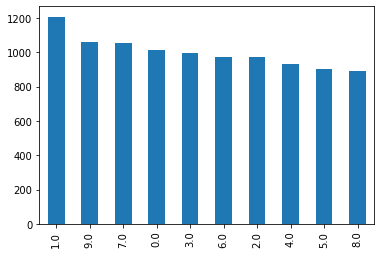

In [53]:
prediction = pd.DataFrame(prediction)
prediction[0].value_counts().plot.bar()
print(prediction[0].value_counts())

1.0    1135
2.0    1032
7.0    1028
3.0    1010
9.0    1009
4.0     982
0.0     980
8.0     974
6.0     958
5.0     892
Name: 0, dtype: int64


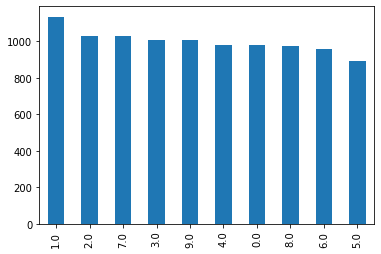

In [54]:
true_target = pd.DataFrame(y_test.reshape(10000,1))
true_target[0].value_counts().plot.bar()
print(true_target[0].value_counts())

In [55]:
from sklearn.metrics import confusion_matrix
confusion_table = confusion_matrix(true_target, prediction)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[9.87e-01, 8.81e-04, 0.00e+00, 9.90e-04, 0.00e+00, 2.24e-03,
        6.26e-03, 1.95e-03, 1.03e-03, 0.00e+00],
       [1.02e-03, 9.96e-01, 9.69e-04, 9.90e-04, 0.00e+00, 0.00e+00,
        2.09e-03, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.43e-02, 1.50e-02, 9.18e-01, 6.93e-03, 2.04e-03, 1.12e-03,
        5.22e-03, 2.53e-02, 1.33e-02, 0.00e+00],
       [1.02e-03, 4.41e-03, 8.72e-03, 9.20e-01, 1.02e-03, 3.81e-02,
        1.04e-03, 8.75e-03, 1.33e-02, 7.93e-03],
       [2.04e-03, 9.69e-03, 2.91e-03, 0.00e+00, 9.13e-01, 0.00e+00,
        6.26e-03, 4.86e-03, 3.08e-03, 5.45e-02],
       [5.10e-03, 1.76e-03, 1.94e-03, 2.28e-02, 0.00e+00, 9.27e-01,
        1.15e-02, 3.89e-03, 5.13e-03, 1.29e-02],
       [1.02e-02, 2.64e-03, 0.00e+00, 0.00e+00, 5.09e-03, 4.48e-03,
        9.76e-01, 9.73e-04, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.47e-02, 3.88e-03, 0.00e+00, 2.04e-03, 1.12e-03,
        0.00e+00, 9.40e-01, 0.00e+00, 2.68e-02],
       [8.16e-03, 4.41e-03, 5.81e-03, 2.67e-02, 9.16e-03, 3.59e-

In [56]:
from sklearn.metrics import classification_report
print(classification_report(true_target, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       980
         1.0       0.94      1.00      0.97      1135
         2.0       0.97      0.92      0.94      1032
         3.0       0.93      0.92      0.93      1010
         4.0       0.96      0.91      0.94       982
         5.0       0.91      0.93      0.92       892
         6.0       0.96      0.98      0.97       958
         7.0       0.92      0.94      0.93      1028
         8.0       0.96      0.87      0.91       974
         9.0       0.88      0.92      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



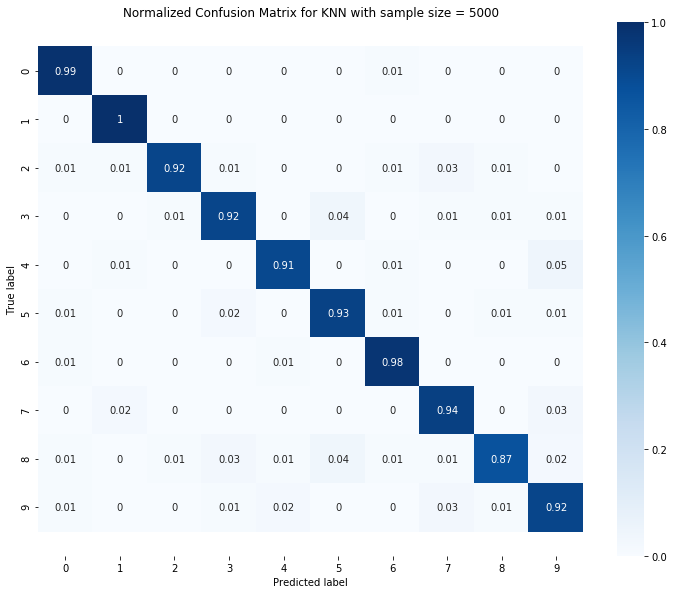

In [58]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for KNN with sample size = 5000')
plt.show()